# EDA Germany 

In [9]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime
from IPython import display
import os
import datetime

In [10]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all3.csv")

date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

df["departure_plan_time"] = df["departure_plan"].dt.time
df["departure_plan_date"] = df["departure_plan"].dt.date

df.drop(labels=["ID", "eva_nr", "zip"], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545209 entries, 0 to 1545208
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   line                   1545209 non-null  object        
 1   path                   1386703 non-null  object        
 2   category               1545209 non-null  int64         
 3   station                1545209 non-null  object        
 4   state                  1545209 non-null  object        
 5   city                   1545209 non-null  object        
 6   long                   1545209 non-null  float64       
 7   lat                    1545209 non-null  float64       
 8   arrival_plan           1386703 non-null  datetime64[ns]
 9   departure_plan         1545209 non-null  datetime64[ns]
 10  arrival_change         1190305 non-null  datetime64[ns]
 11  departure_change       1293401 non-null  datetime64[ns]
 12  arrival_delay_m        15452

In [12]:
df.describe()

,category,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m
count,1.545209e+06,1.545209e+06,1.545209e+06,1386703,1545209,1190305,1293401,1.545209e+06,1.545209e+06
mean,3.873418e+00,1.017980e+01,5.087272e+01,2024-07-10 13:29:41.578955264,2024-07-10 13:29:11.159927040,2024-07-10 13:28:27.067986176,2024-07-10 13:27:08.839811328,1.262979e+00,1.309834e+00
min,1.000000e+00,6.070715e+00,4.741103e+01,2024-07-07 23:37:00,2024-07-08 00:00:00,2024-07-07 23:39:00,2024-07-08 00:00:00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.494792e+00,4.934848e+01,2024-07-09 08:53:00,2024-07-09 08:51:00,2024-07-09 09:00:00,2024-07-09 08:58:00,0.000000e+00,0.000000e+00
50%,4.000000e+00,9.935780e+00,5.106590e+01,2024-07-10 13:41:00,2024-07-10 13:39:00,2024-07-10 13:40:00,2024-07-10 13:37:00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.208564e+01,5.247808e+01,2024-07-11 18:07:00,2024-07-11 18:07:00,2024-07-11 17:58:00,2024-07-11 17:58:00,1.000000e+00,1.000000e+00
max,5.000000e+00,1.497908e+01,5.490684e+01,2024-07-12 23:59:00,2024-07-13 00:12:00,2024-07-13 00:47:00,2024-07-13 00:48:00,1.590000e+02,1.590000e+02
std,1.035577e+00,2.273605e+00,1.790447e+00,NaN,NaN,NaN,NaN,3.526700e+00,3.533421e+00


In [13]:
df.head()

,line,path,category,station,state,city,long,lat,arrival_plan,departure_plan,...,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,...,2024-07-08 00:04:00,3,3,NaN,on_time,on_time,00:00:00,2024-07-08,00:01:00,2024-07-08
1,18,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-07-08 00:17:00,...,NaT,0,0,NaN,on_time,on_time,NaT,NaT,00:17:00,2024-07-08
2,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,...,2024-07-08 00:04:00,0,0,NaN,on_time,on_time,00:03:00,2024-07-08,00:04:00,2024-07-08
3,18,Aachen Hbf,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,NaT,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08
4,33,Herzogenrath|Kohlscheid,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,2024-07-08 00:21:00,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08


In [14]:
df.state.unique()


array(['Nordrhein-Westfalen', 'Baden-Württemberg', 'Niedersachsen',
       'Schleswig-Holstein', 'Bayern', 'Berlin', 'Hamburg', 'Thüringen',
       'Rheinland-Pfalz', 'Mecklenburg-Vorpommern', 'Sachsen',
       'Sachsen-Anhalt', 'Brandenburg', 'Hessen', 'Saarland', 'Bremen'],
      dtype=object)

creating a dictionary to store the dataframe seperated by states

In [15]:
statelist = df.state.unique()
frames = {}
for state in statelist:
    frames[state] = df[df["state"] == state]


# Change Information

In [16]:
df["info"].unique()

array([nan, 'Bauarbeiten. (Quelle: zuginfo.nrw)', 'Information',
       'Information. (Quelle: zuginfo.nrw)', 'Bauarbeiten', 'Störung',
       'Großstörung', 'Störung. (Quelle: zuginfo.nrw)'], dtype=object)

Combining the strings with the "Quelle: zuginfo.nrw" with the ones without to properly count the values

<Axes: xlabel='info'>

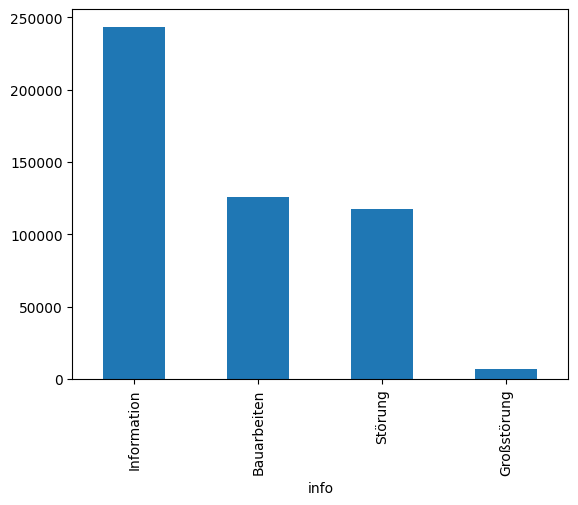

In [17]:
date_replacements = {
    'Bauarbeiten. (Quelle: zuginfo.nrw)': 'Bauarbeiten',
    'Störung. (Quelle: zuginfo.nrw)' : 'Störung',
    'Information. (Quelle: zuginfo.nrw)' : 'Information',
}
df['info'] = df['info'].replace(date_replacements)

df["info"].value_counts().plot.bar()

grouping by station names and creating features for the count of occurences of the distinct Information categories.

In [18]:
df_info = df.groupby(("station")).mean(numeric_only=True).copy()
df_info["disturbance"] = df[df["info"] == "Störung"][["station","departure_plan"]].groupby(("station")).count()
df_info["information"] = df[df["info"] == "Information"][["station","departure_plan"]].groupby(("station")).count()
df_info["construction"] = df[df["info"] == "Bauarbeiten"][["station","departure_plan"]].groupby(("station")).count()
df_info["area_disturbance"] = df[df["info"] == "Großstörung"][["station","departure_plan"]].groupby(("station")).count()

In [19]:
df_info.head()

,category,long,lat,arrival_delay_m,departure_delay_m,disturbance,information,construction,area_disturbance
station,,,,,,,,,
Aachen Hbf,2.0,6.091499,50.767800,0.267528,0.484317,92.0,75.0,9.0,NaN
Aachen Schanz,5.0,6.073840,50.769862,1.175737,1.318594,133.0,NaN,4.0,NaN
Aachen West,5.0,6.070715,50.780360,0.878931,1.047956,168.0,NaN,4.0,NaN
Aachen-Rothe Erde,4.0,6.116475,50.770202,1.236652,1.229437,59.0,97.0,4.0,NaN
Aalen Hbf,3.0,10.096271,48.841013,0.365105,0.512116,1.0,286.0,NaN,NaN


In [20]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [21]:

fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='construction',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.construction.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="construction heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


In [22]:
fig = px.density_mapbox(
    df_info,
    lat='lat',
    lon='long',
    z='area_disturbance',
    hover_name=df_info.index,
    radius=10,
    range_color=[0, df_info.area_disturbance.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="area_disturbance heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.show()


# Geographical analysis

In [23]:
heatmap_df = df.groupby("station", as_index=False ).mean(numeric_only=True)

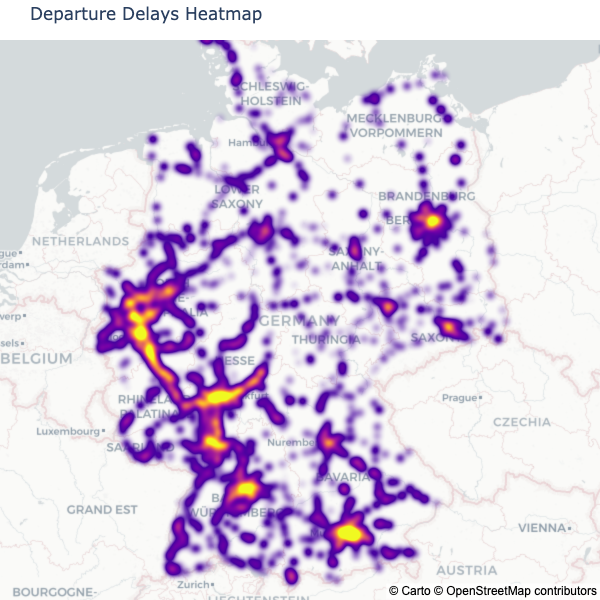

In [24]:

fig = px.density_mapbox(
    heatmap_df,
    lat='lat',
    lon='long',
    z='departure_delay_m',
    hover_name="station",
    radius=10,
    range_color=[0, heatmap_df.departure_delay_m.max()],
    mapbox_style="carto-positron",
    center={"lat": 51.1657, "lon": 10.4515},
    zoom=5,
    width=600,
    height=600,
    title="Departure Delays Heatmap",
)

fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
    coloraxis_showscale=False
    )

fig.write_image("images/heatmap.png", scale=1)
display.Image("images/heatmap.png")


# Creating Features for further analysis

In [25]:
df_state_count_delay2 = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count = df.groupby("state", as_index=False).count()
df_state_sum = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).sum("departure_delay_m")

## Merging Dataframes

In [26]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [27]:
df_state = df_state[[
    'state', 
    #'eva_nr', 'category', 'zip', 'long', 'lat', 
    'departure_delay_m', 'departure_plan',
    'departure_delay_check',
    ]]
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check
0,Baden-Württemberg,176867,192535,14907
1,Bayern,216187,248061,19602
2,Berlin,45263,250732,4141
3,Brandenburg,31934,43859,2346
4,Bremen,1840,7666,102


## Calculating new Columns

In [28]:
df_state["delay_m/departure"] = (df_state["departure_delay_m"] / df_state["departure_plan"])
df_state["delay_m/delay_cnt"] = (df_state["departure_delay_m"] / df_state["departure_delay_check"])
df_state["delay_cnt/departure"] = (df_state["departure_delay_check"] / df_state["departure_plan"]) *100


In [29]:
df_state.head()

,state,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
0,Baden-Württemberg,176867,192535,14907,0.918623,11.864694,7.742488
1,Bayern,216187,248061,19602,0.871507,11.028824,7.902089
2,Berlin,45263,250732,4141,0.180523,10.930452,1.651564
3,Brandenburg,31934,43859,2346,0.728106,13.612106,5.348959
4,Bremen,1840,7666,102,0.240021,18.039216,1.330550


In [30]:
df_state.describe()

,departure_delay_m,departure_plan,departure_delay_check,delay_m/departure,delay_m/delay_cnt,delay_cnt/departure
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,68954.875000,96575.562500,5790.937500,0.640275,12.513399,5.206560
std,85811.530693,92984.690204,7241.483922,0.305892,1.837039,2.621822
min,1840.000000,7666.000000,102.000000,0.166798,9.488900,1.330550
25%,11285.500000,21778.250000,948.000000,0.472603,11.670410,3.842447
50%,32658.500000,59871.500000,2486.500000,0.627863,12.306817,4.750470
75%,82834.500000,161167.750000,6973.000000,0.837406,13.200403,6.995604
max,284162.000000,257541.000000,22972.000000,1.175003,18.039216,10.068338


# Side by Side comparison

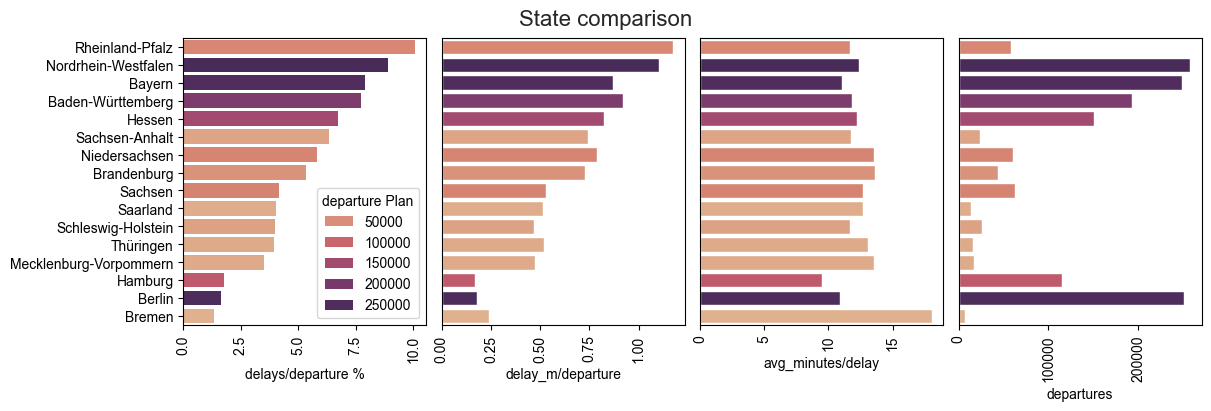

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_cnt/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/departure %")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title="departure Plan")

sns.set_theme(style="whitegrid")
sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].set_ylabel("states")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title="departure Plan")
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="delay_m/delay_cnt", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[2])
axes[2].set_xlabel(f"avg_minutes/delay")
axes[2].set_ylabel("states")
axes[2].tick_params(axis='x', rotation=90)
axes[2].legend(title="departure Plan")
axes[2].get_legend().remove()
axes[2].get_yaxis().set_visible(False)

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False).head(16), y="state", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[3])
axes[3].set_xlabel(f"departures")
axes[3].set_ylabel("states")
axes[3].tick_params(axis='x', rotation=90)
axes[3].legend(title="departure Plan")
axes[3].get_legend().remove()
axes[3].get_yaxis().set_visible(False)



fig.suptitle("State comparison", fontsize=16)
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay% to departure events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are contributing much less to the total amount of arrival events and therefore not as important to prioritize.

# Per State

In [32]:
station_top = {} #initiate dictionary

In [33]:
country_mean = df_state["delay_cnt/departure"].mean()

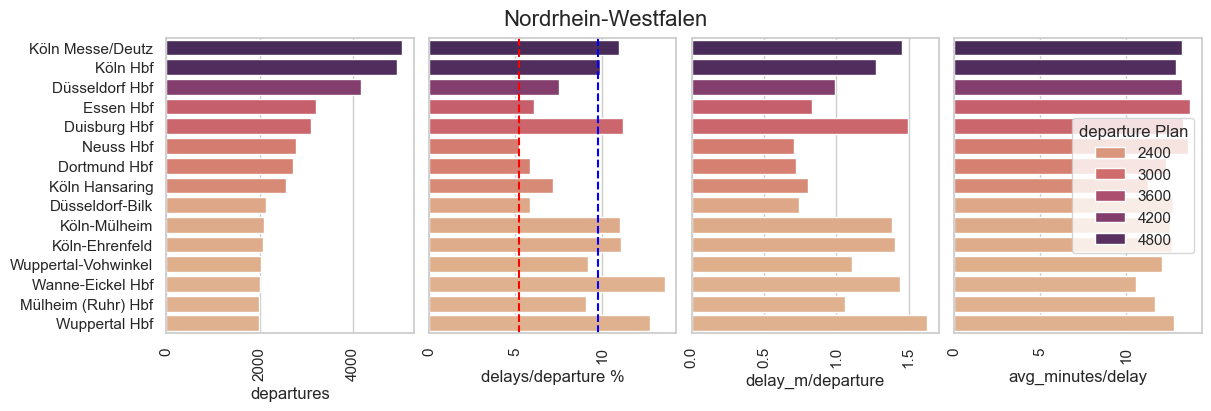

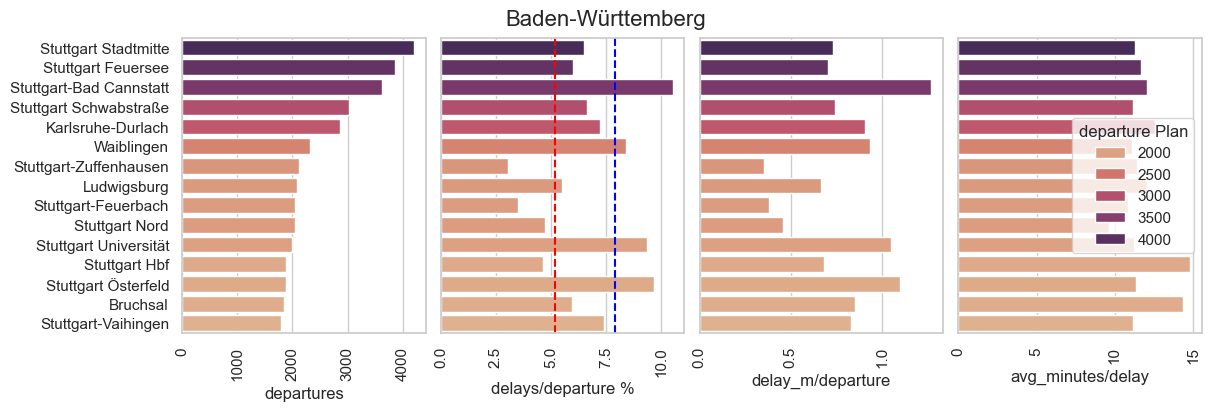

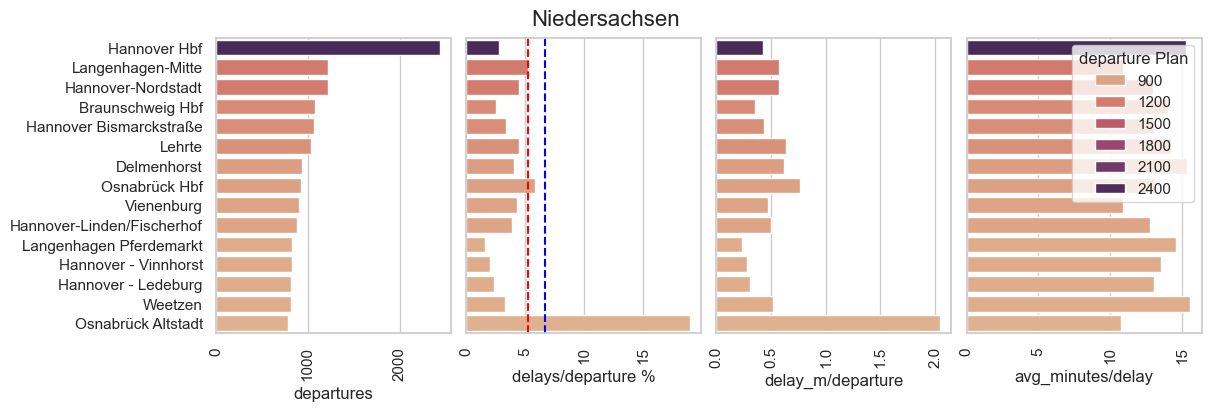

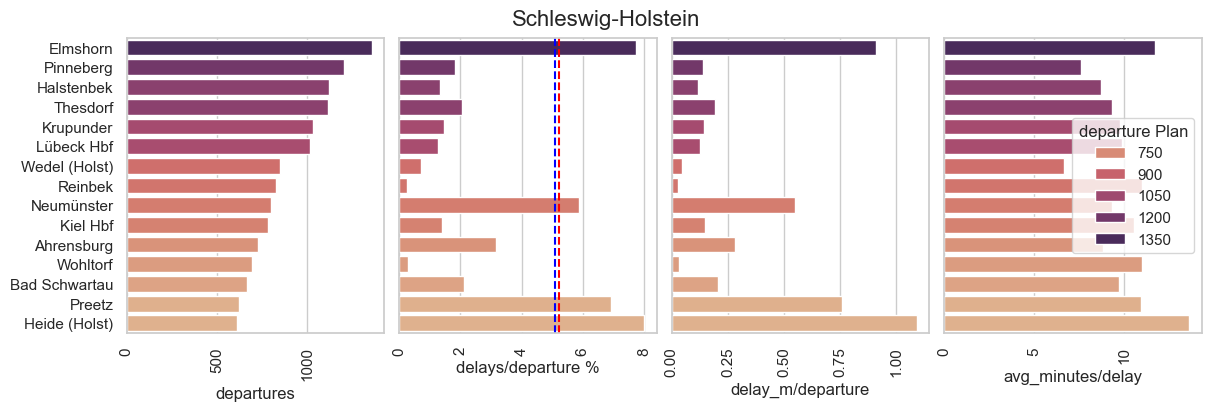

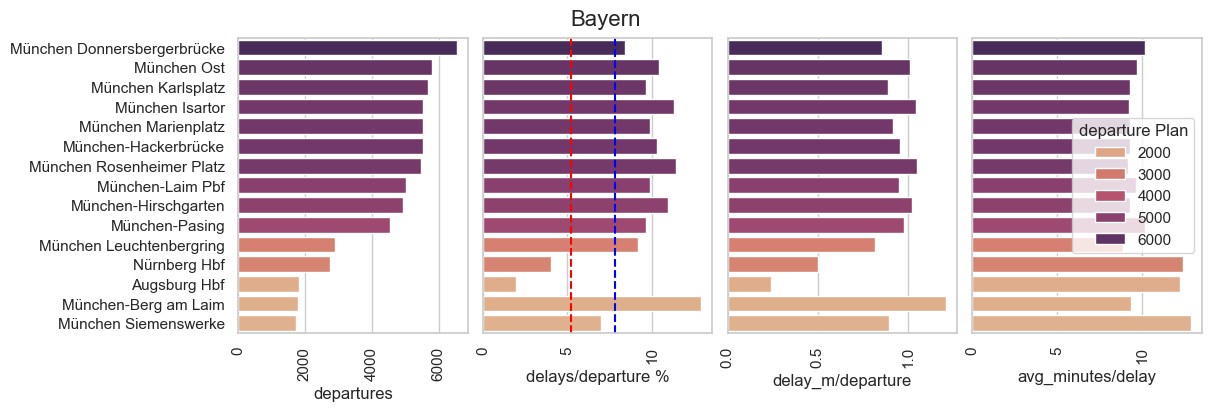

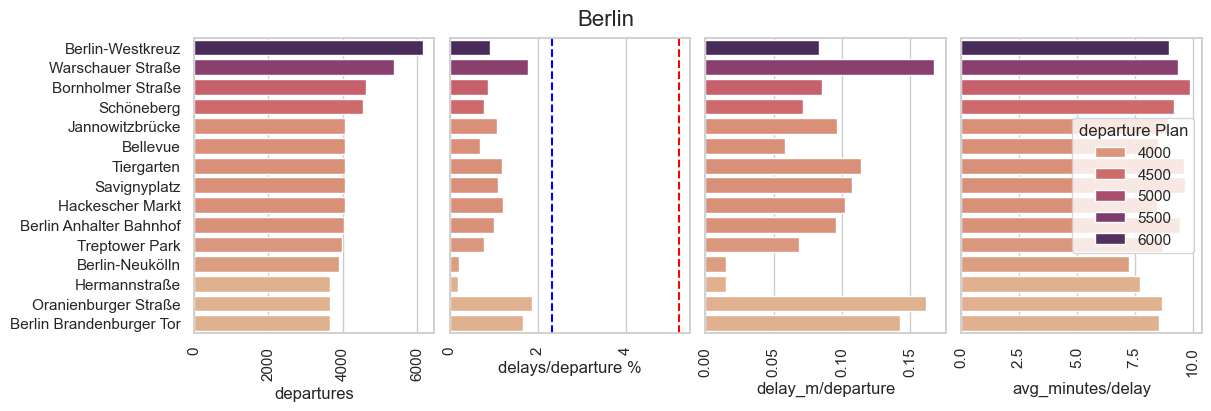

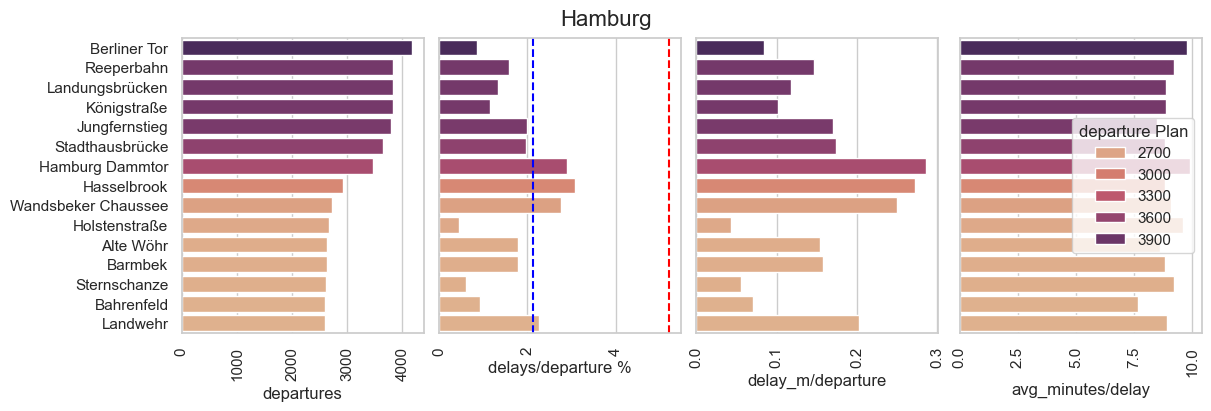

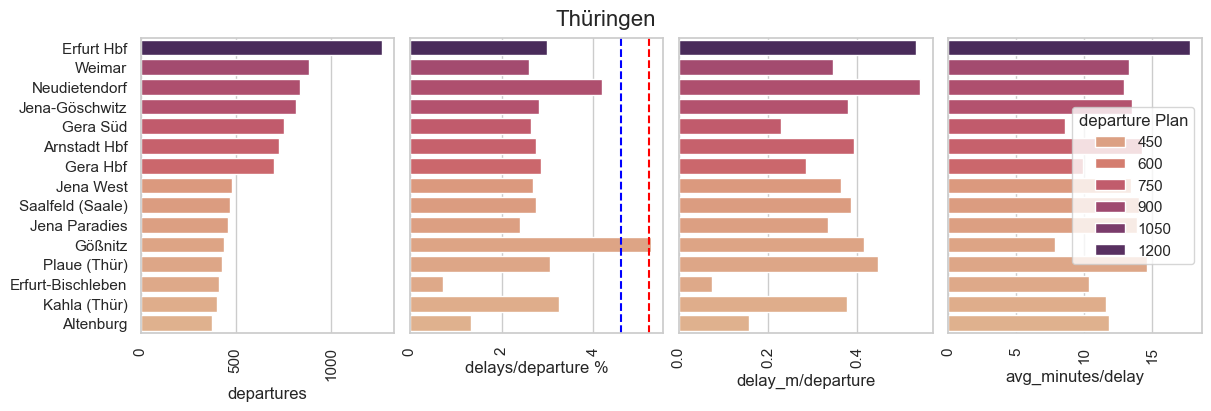

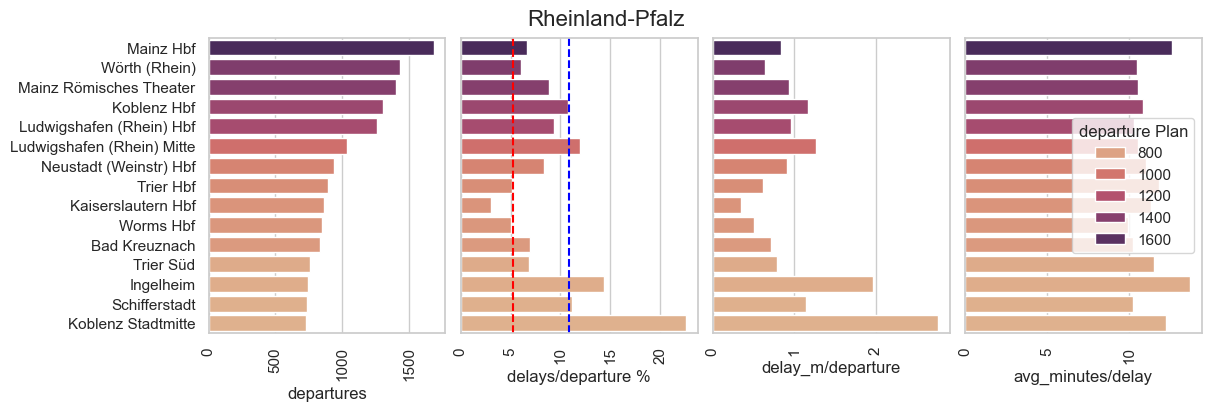

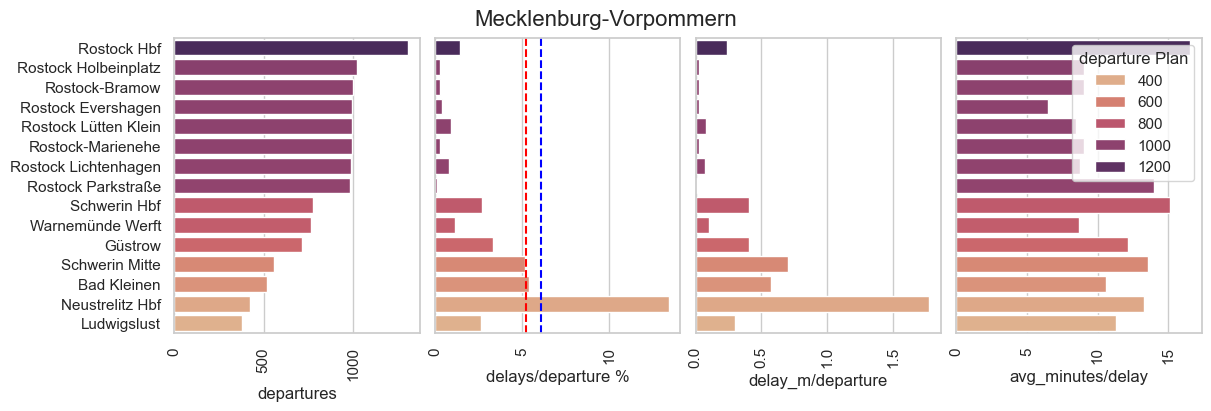

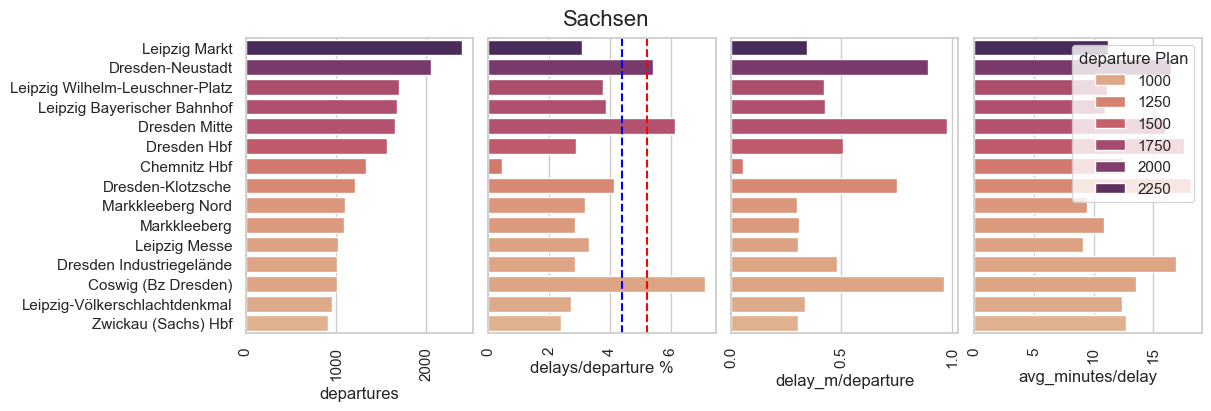

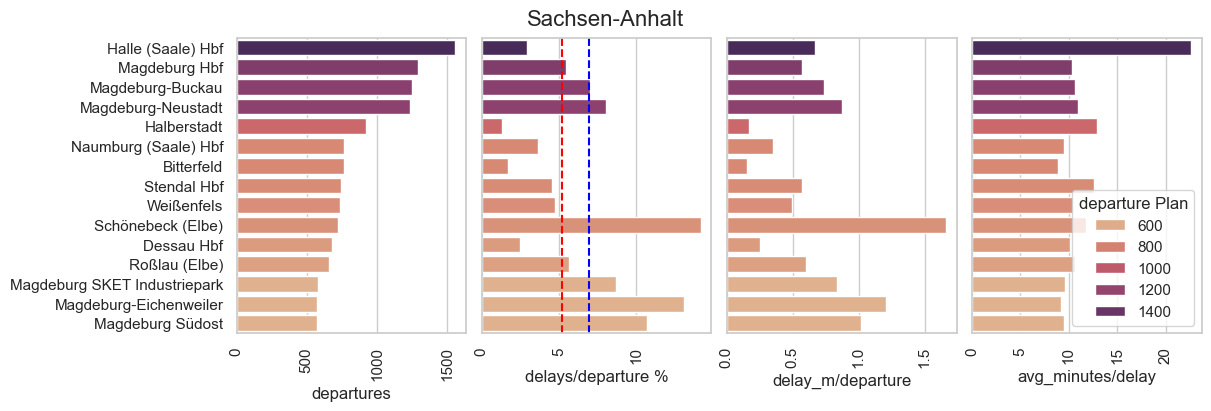

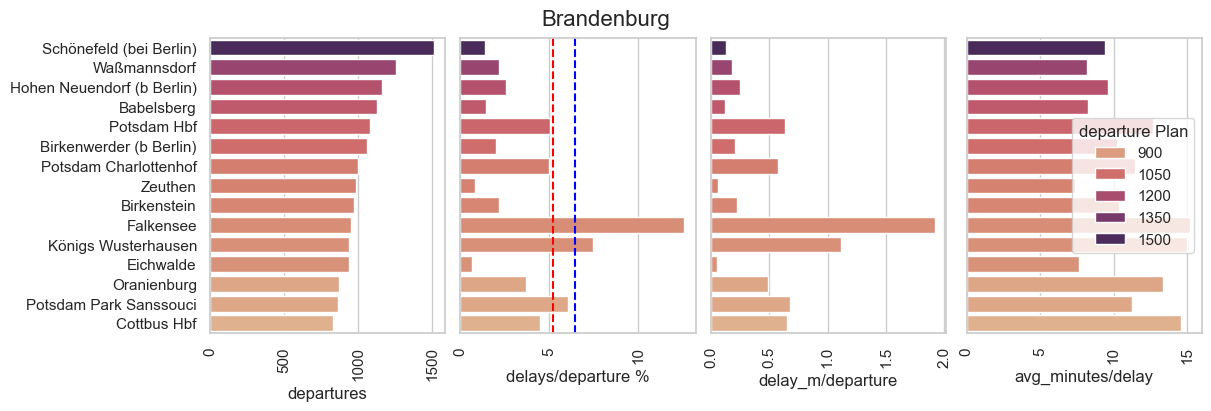

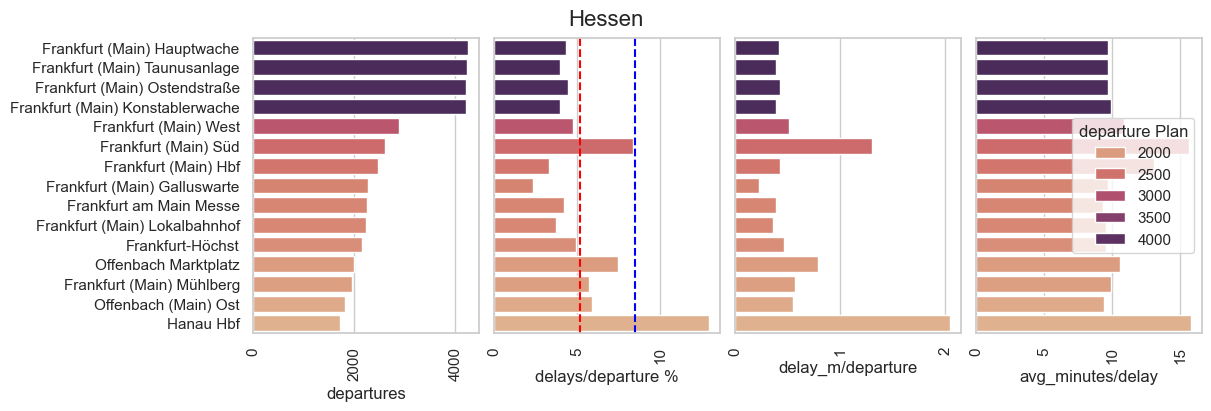

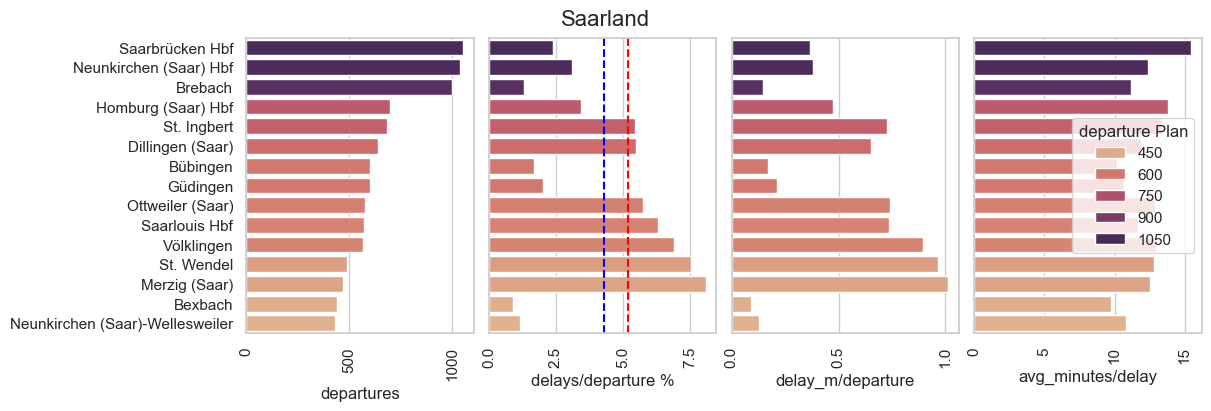

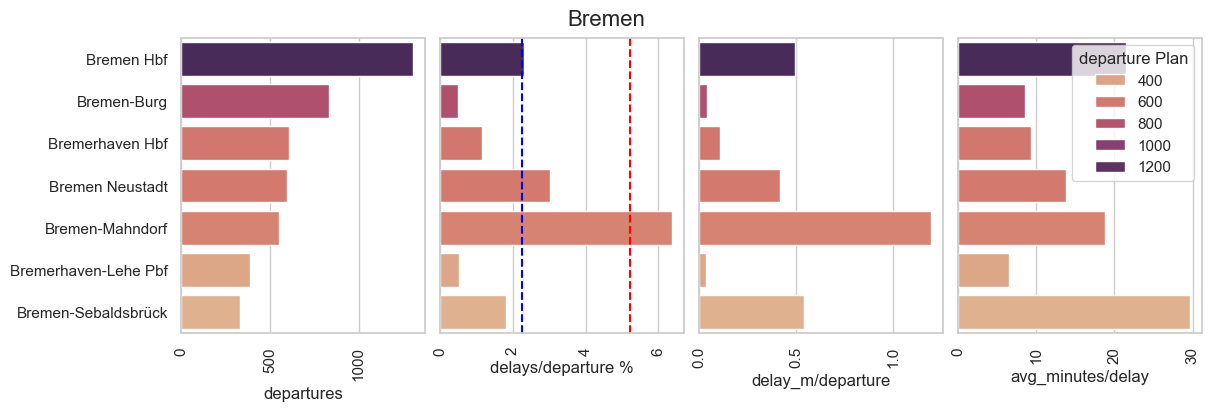

In [34]:

for state in statelist:
    df_station = frames[state].copy()
    df_station_sum = df_station[df_station["departure_delay_check"] == "delay"].groupby(["station"], as_index=False).sum("departure_delay_m")
    df_station_count = df_station.groupby(["station"], as_index=False).count()
    df_station_count_delay = df_station[df_station["departure_delay_check"] == "delay"].groupby(["station"], as_index=False).count()

    df_station = pd.merge(df_station_sum, df_station_count[["station","departure_plan"]], how='left', on="station", suffixes=('', '_count'))
    df_station = pd.merge(df_station, df_station_count_delay[["station","departure_delay_check"]], how='left', on="station", suffixes=('', '_count'))
    
    df_station["delay_m/departure"] = (df_station["departure_delay_m"] / df_station["departure_plan"])
    df_station["delay_m/delay_cnt"] = (df_station["departure_delay_m"] / df_station["departure_delay_check"])
    df_station["delay_cnt/departure"] = (df_station["departure_delay_check"] / df_station["departure_plan"]) *100
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    state_mean = df_station["delay_cnt/departure"].mean()

    station_top[state] = df_station.sort_values(by="departure_plan", ascending=False).head(15)
    station_top[state] = station_top[state].sort_values(by="delay_cnt/departure", ascending=False).station.head().values
    #collecting the names of the 5 stations with the most departure from the top 15 delays/departure in a dictionary per state

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()


    

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_station.sort_values(by="departure_plan", ascending=False).head(15), y="station", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    #axes[3].get_legend().remove()
    axes[3].get_yaxis().set_visible(False)
    axes[3].legend(title="departure Plan")




    fig.suptitle(state, fontsize=16)
    plt.show()


In [35]:
station_top

{'Nordrhein-Westfalen': array(['Wanne-Eickel Hbf', 'Wuppertal Hbf', 'Duisburg Hbf',
        'Köln-Ehrenfeld', 'Köln-Mülheim'], dtype=object),
 'Baden-Württemberg': array(['Stuttgart-Bad Cannstatt', 'Stuttgart Österfeld',
        'Stuttgart Universität', 'Waiblingen', 'Stuttgart-Vaihingen'],
       dtype=object),
 'Niedersachsen': array(['Osnabrück Altstadt', 'Osnabrück Hbf', 'Langenhagen-Mitte',
        'Lehrte', 'Hannover-Nordstadt'], dtype=object),
 'Schleswig-Holstein': array(['Heide (Holst)', 'Elmshorn', 'Preetz', 'Neumünster', 'Ahrensburg'],
       dtype=object),
 'Bayern': array(['München-Berg am Laim', 'München Rosenheimer Platz',
        'München Isartor', 'München-Hirschgarten', 'München Ost'],
       dtype=object),
 'Berlin': array(['Oranienburger Straße', 'Warschauer Straße',
        'Berlin Brandenburger Tor', 'Hackescher Markt', 'Tiergarten'],
       dtype=object),
 'Hamburg': array(['Hasselbrook', 'Hamburg Dammtor', 'Wandsbeker Chaussee',
        'Landwehr', 'Jungfernstie

# per Line

In [36]:
line_top = {}

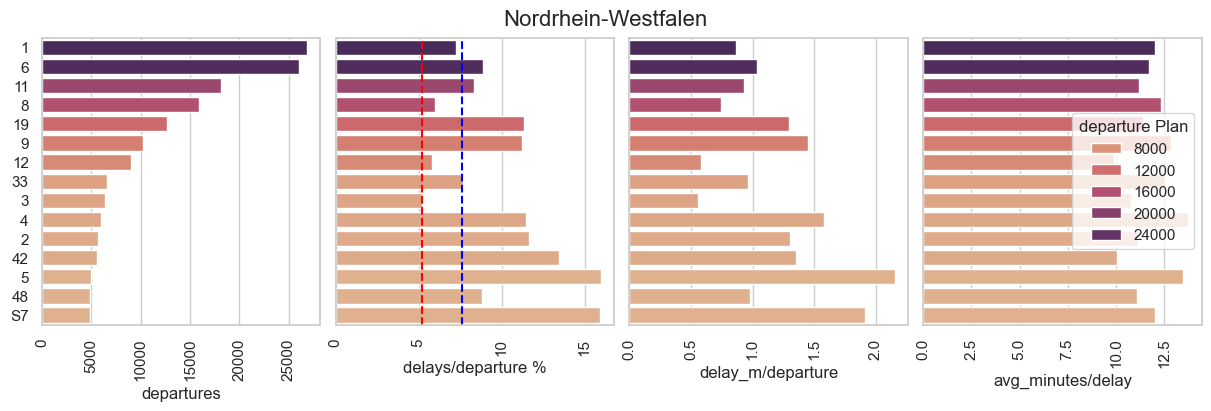

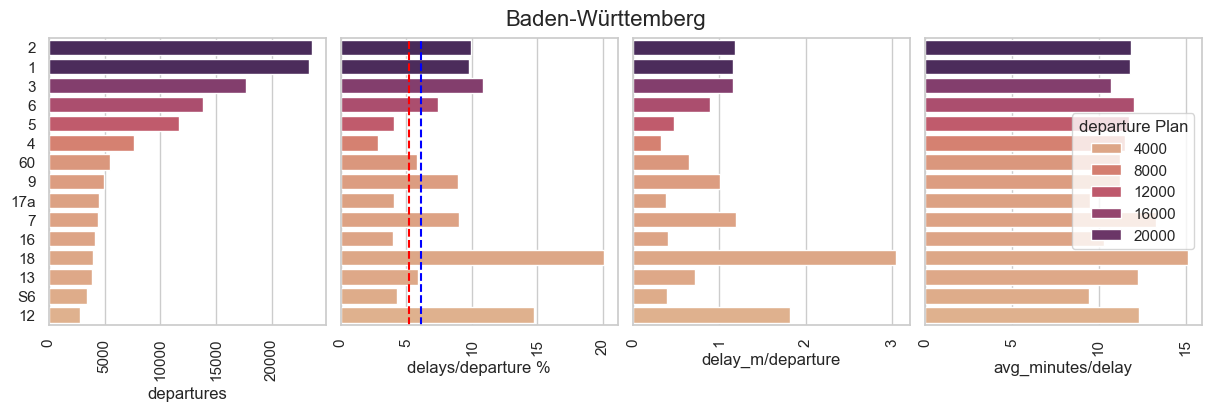

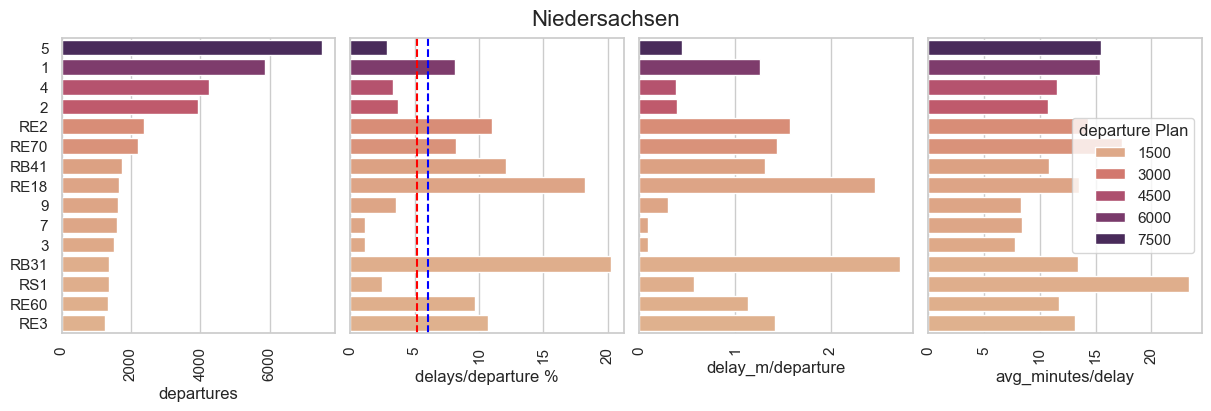

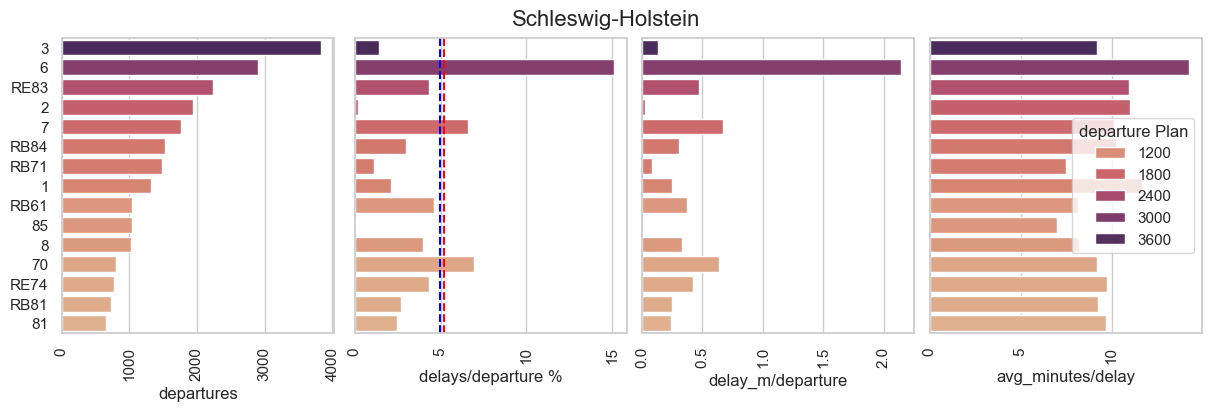

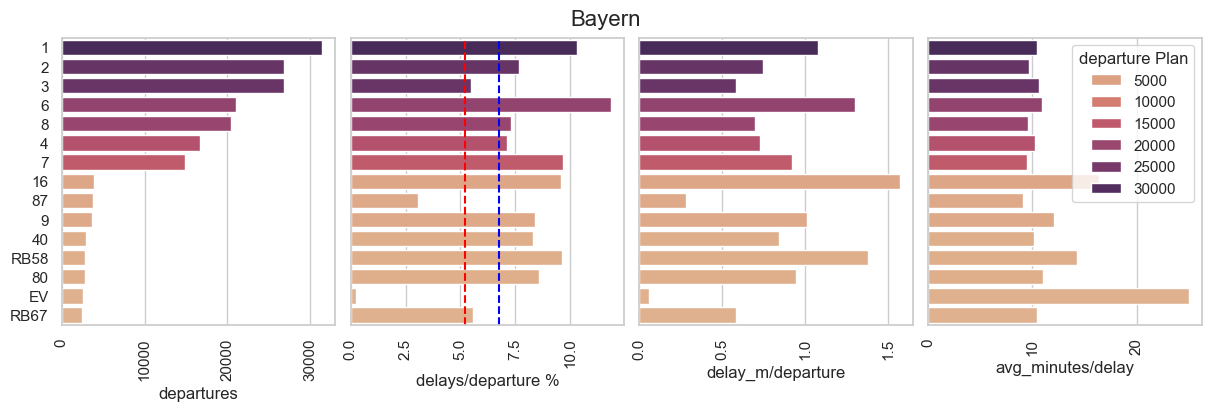

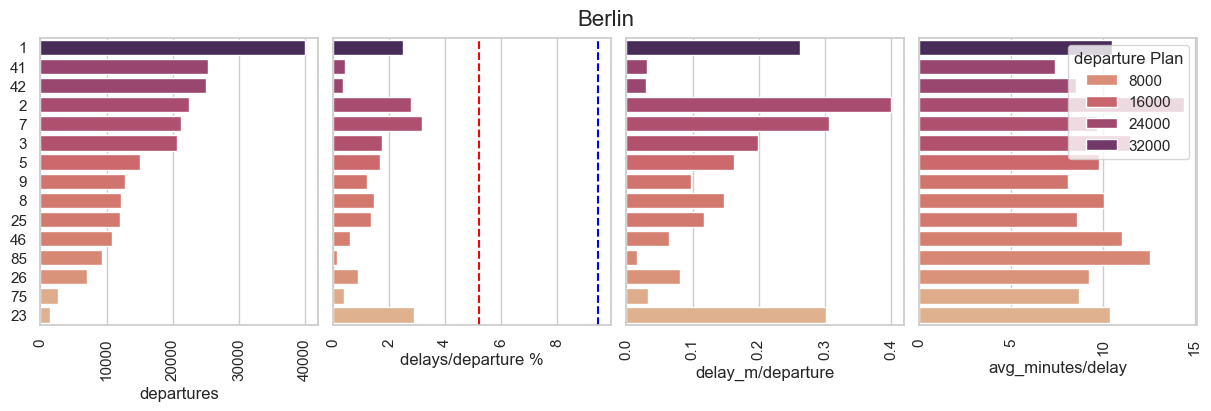

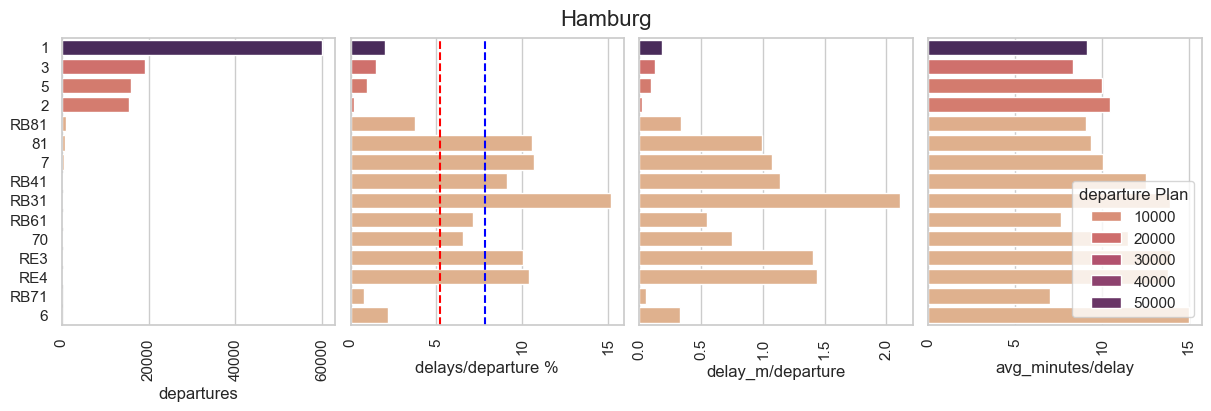

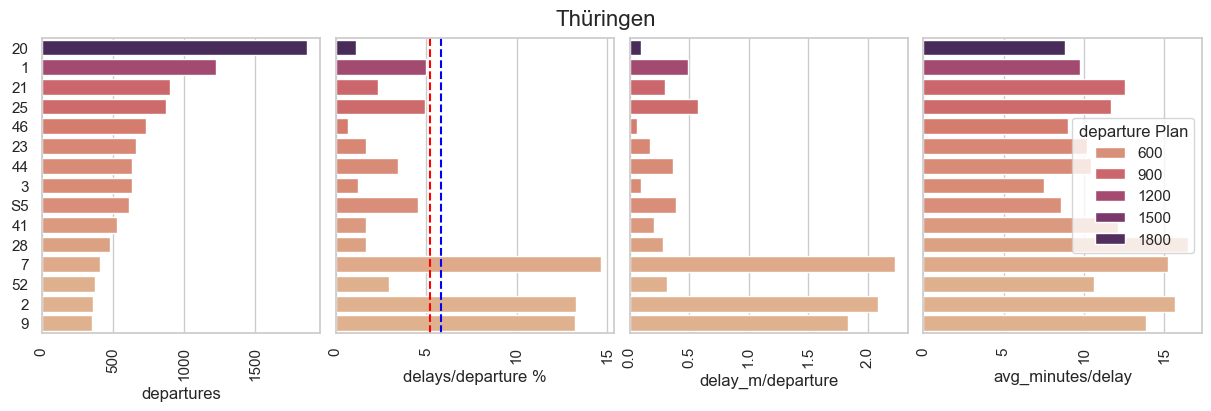

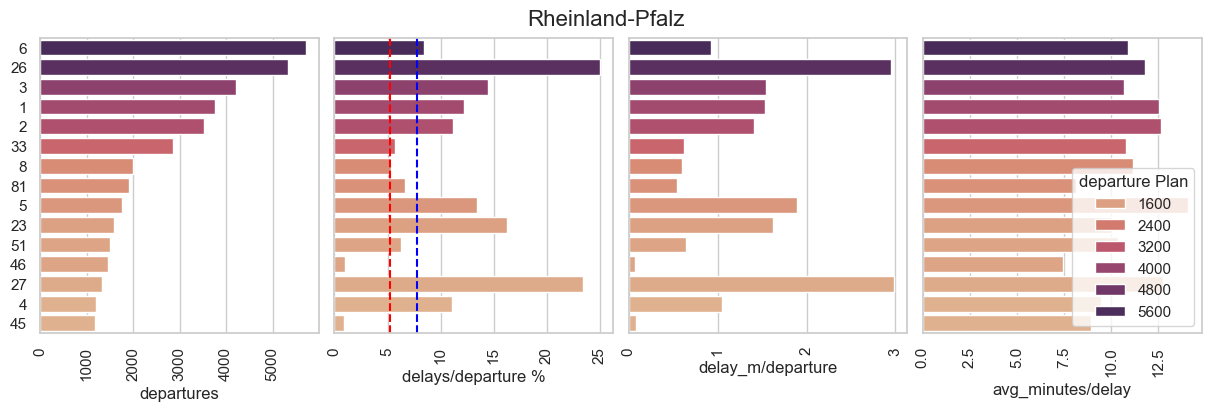

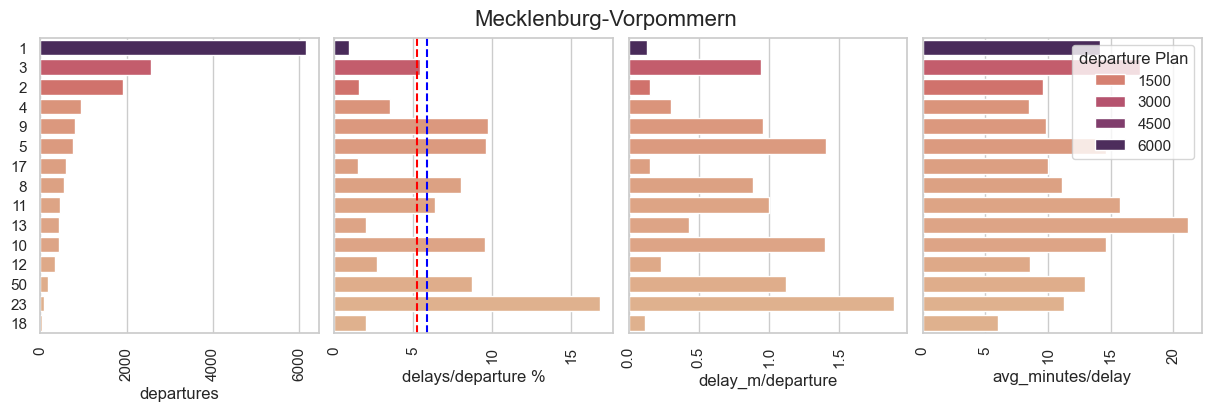

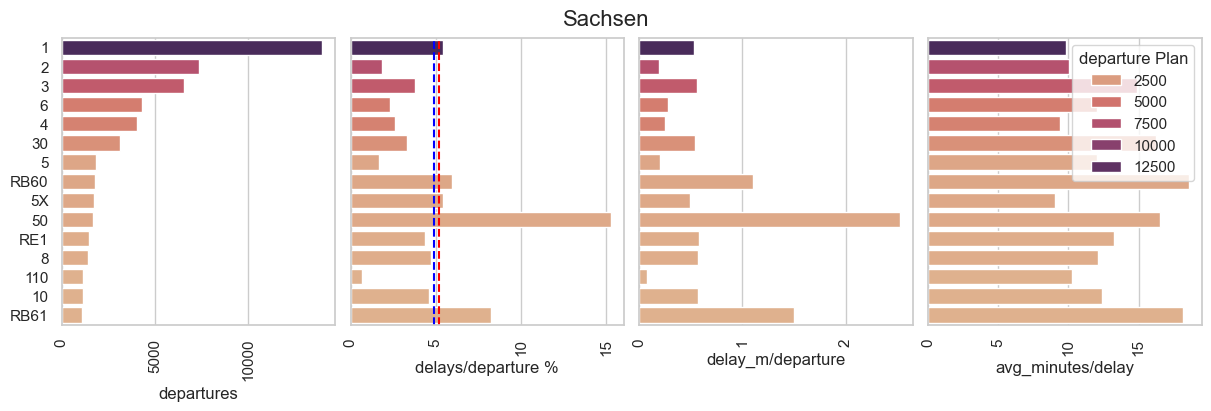

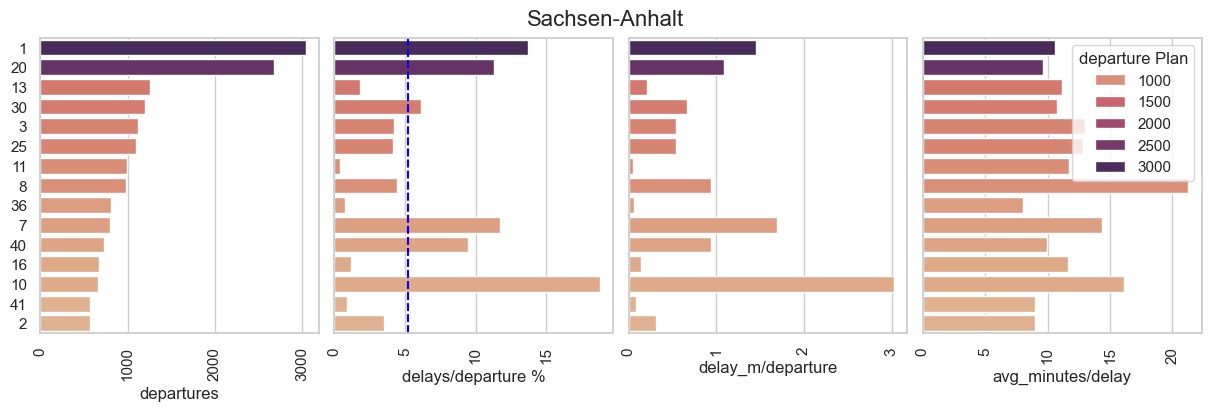

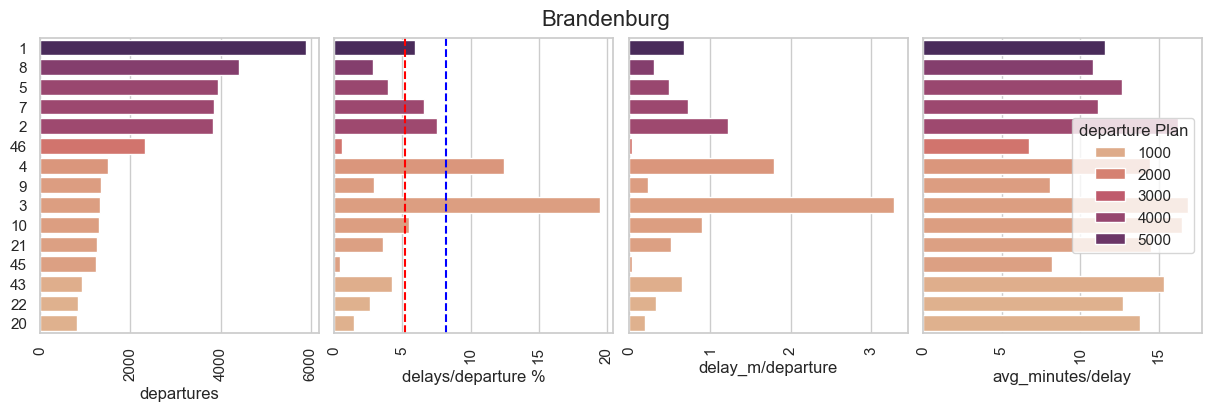

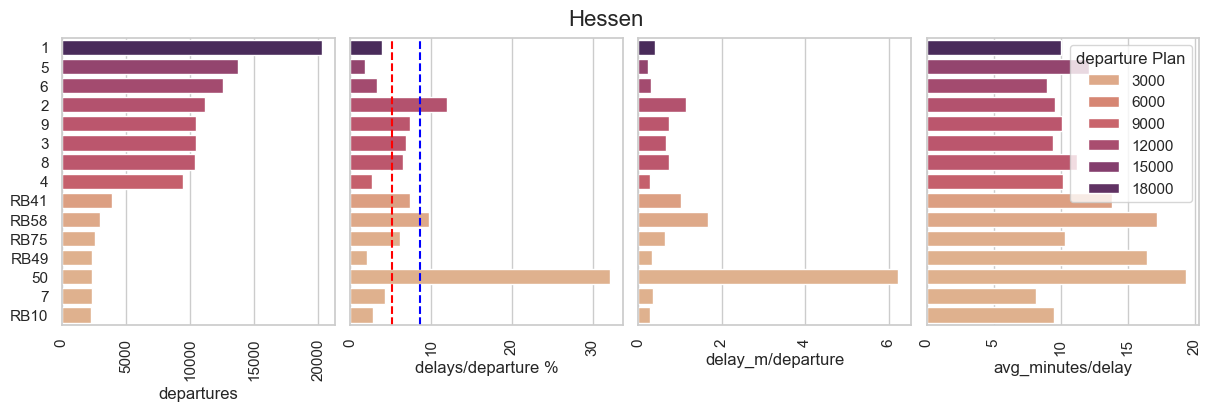

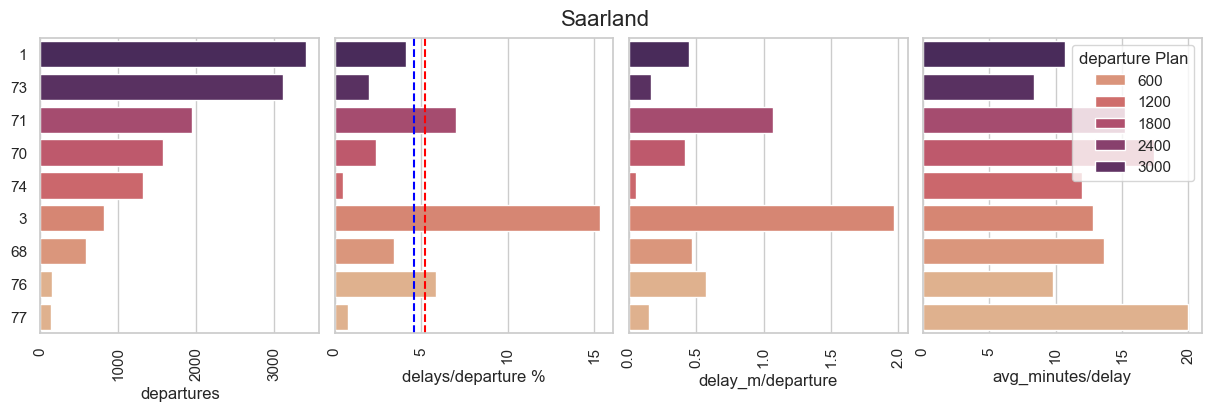

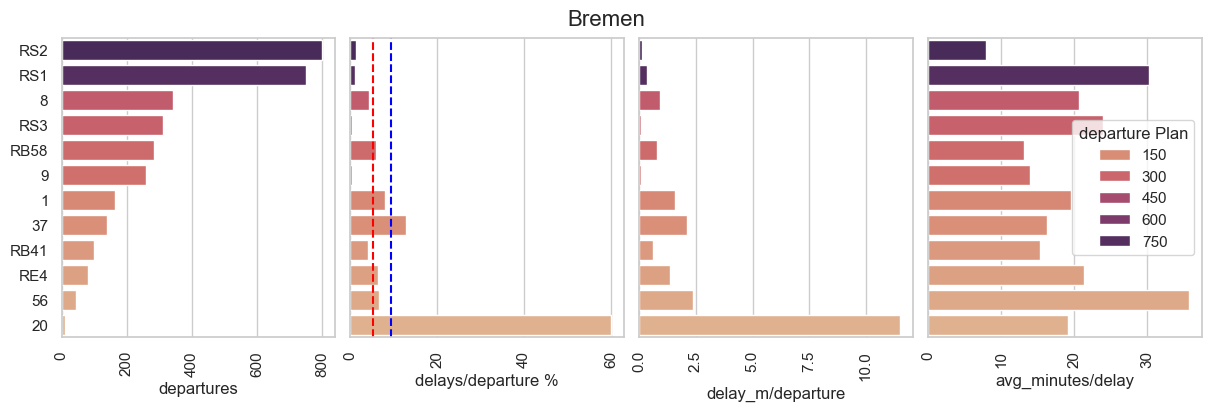

In [37]:
for state in statelist:
    df_line = frames[state].copy()
    df_line_sum = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).sum("departure_delay_m")
    df_line_count = df_line.groupby(["line"], as_index=False).count()
    df_line_count_delay = df_line[df_line["departure_delay_check"] == "delay"].groupby(["line"], as_index=False).count()

    df_line = pd.merge(df_line_sum, df_line_count[["line","departure_plan"]], how='left', on="line", suffixes=('', '_count'))
    df_line = pd.merge(df_line, df_line_count_delay[["line","departure_delay_check"]], how='left', on="line", suffixes=('', '_count'))
    
    df_line["delay_m/departure"] = (df_line["departure_delay_m"] / df_line["departure_plan"])
    df_line["delay_m/delay_cnt"] = (df_line["departure_delay_m"] / df_line["departure_delay_check"])
    df_line["delay_cnt/departure"] = (df_line["departure_delay_check"] / df_line["departure_plan"]) *100
    
    state_mean = df_line["delay_cnt/departure"].mean()
 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

    line_top[state] = df_line.sort_values(by="departure_plan", ascending=False).head(15)
    line_top[state] = line_top[state].sort_values(by="delay_cnt/departure", ascending=False).line.head().values
    #adding the names of the lines from the top 15 delay/departures filtered by the top 5 number of departures into the dictionary

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="departure_plan", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[0])
    axes[0].set_xlabel(f"departures")
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].set_ylabel("")
    axes[0].get_legend().remove()

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_cnt/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[1])
    axes[1].set_xlabel(f"delays/departure %")
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].get_legend().remove()
    axes[1].get_yaxis().set_visible(False)
    axes[1].axvline(x=country_mean, color='red', linestyle='--')
    axes[1].axvline(x=state_mean, color='blue', linestyle='--')

    sns.set_theme(style="whitegrid")
    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/departure", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[2])
    axes[2].set_xlabel(f"delay_m/departure")
    axes[2].tick_params(axis='x', rotation=90)
    axes[2].get_legend().remove()
    axes[2].get_yaxis().set_visible(False)

    sns.barplot(data=df_line.sort_values(by="departure_plan", ascending=False).head(15), y="line", x="delay_m/delay_cnt", 
                palette="flare", orient="h", hue="departure_plan", ax=axes[3])
    axes[3].set_xlabel(f"avg_minutes/delay")
    axes[3].tick_params(axis='x', rotation=90)
    axes[3].legend(title="departure Plan")
    axes[3].get_yaxis().set_visible(False)




    fig.suptitle(state, fontsize=16)
    plt.show()


In [38]:
line_top

{'Nordrhein-Westfalen': array(['5', 'S7', '42', '2', '4'], dtype=object),
 'Baden-Württemberg': array(['18', '12', '3', '2', '1'], dtype=object),
 'Niedersachsen': array(['RB31', 'RE18', 'RB41', 'RE2', 'RE3'], dtype=object),
 'Schleswig-Holstein': array(['6', '70', '7', 'RB61', 'RE74'], dtype=object),
 'Bayern': array(['6', '1', '7', 'RB58', '16'], dtype=object),
 'Berlin': array(['7', '23', '2', '1', '3'], dtype=object),
 'Hamburg': array(['RB31', '7', '81', 'RE4', 'RE3'], dtype=object),
 'Thüringen': array(['7', '2', '9', '1', '25'], dtype=object),
 'Rheinland-Pfalz': array(['26', '27', '23', '3', '5'], dtype=object),
 'Mecklenburg-Vorpommern': array(['23', '9', '5', '10', '50'], dtype=object),
 'Sachsen': array(['50', 'RB61', 'RB60', '1', '5X'], dtype=object),
 'Sachsen-Anhalt': array(['10', '1', '7', '20', '40'], dtype=object),
 'Brandenburg': array(['3', '4', '2', '7', '1'], dtype=object),
 'Hessen': array(['50', '2', 'RB58', 'RB41', '9'], dtype=object),
 'Saarland': array(['3', '

In [39]:
statelist_filtered = ['Nordrhein-Westfalen', 'Baden-Württemberg', 'Bayern', 'Hessen']
line_geo_state = {}
line_geo_list = []

In [40]:
stations_line = []

getting the stations that are passed by the problematic lines

In [41]:
for state in statelist_filtered:
    line_geo = {}
    for line in line_top[state]:
        temp_df = df[(df["state"] == state)&(df['line'] == line)].groupby("station", as_index=False).mean(numeric_only=True)
        stations_line.append(temp_df["station"].values)
        temp_df2 = df[(df["state"] == state)&(df['line'] == line)&(df["departure_delay_check"] == "delay")].groupby("station", as_index=False).count()
        temp_df3 = pd.merge(temp_df, temp_df2[["station","departure_delay_check"]], how='left', on="station", suffixes=('', '_count'))
        temp_df3.fillna(value=0, inplace=True)
        line_geo[f"{line}"] = temp_df3.copy()

    line_geo_state[state] = line_geo





In [42]:
combined_list = []
for item in stations_line:
    combined_list = combined_list + item.tolist()
stations_line = combined_list

In [43]:
combined_list = []
for key in station_top:
    combined_list = combined_list + station_top[key].tolist()
station_top = combined_list

In [44]:
mapbox_state = {
    'Bayern' : [48.7904, 11.4979], 
    'Nordrhein-Westfalen' : [51.4332, 7.6616], 
    'Hessen' : [50.6521, 9.1624], 
    'Baden-Württemberg' : [48.6616, 9.3501]

}


In [45]:
print('<table width="100%" border="1">')

for state in statelist_filtered:
    print("<tr>")
    for key in line_geo_state[state].keys():
        fig = px.density_mapbox(
            line_geo_state[state][key],
            lat='lat',
            lon='long',
            z='departure_delay_check',
            hover_name="station",
            radius=10,
            range_color=[0, line_geo_state[state][key].departure_delay_check.max()],
            mapbox_style="carto-positron",
            center={"lat": mapbox_state[state][0], "lon": mapbox_state[state][1]},
            zoom=7,
            width=600,
            height=600,
            title=f"Delay Heatmap for line {key} in {state}"
        )

        fig.update_layout(
            margin={"r": 0, "t": 40, "l": 0, "b": 0},  # Reduced margins
            coloraxis_showscale=False
            )
        

        fig.write_image(f"images/{state}-{key}.png", scale=1)
        print(f'<td><img src="images/{state}-{key}.png"></td>')
    print("</tr>")
print("</table>")
        

<table width="100%" border="1">
<tr>
<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-S7.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-2.png"></td>
<td><img src="images/Nordrhein-Westfalen-4.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-12.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
<td><img src="images/Baden-Württemberg-1.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-7.png"></td>
<td><img src="images/Bayern-RB58.png"></td>
<td><img src="images/Bayern-16.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-2.png"></td>
<td><img src="images/Hessen-RB58.png"></td>
<td><img src="images/Hessen-RB41.png"></td>
<td><img src="im

<table width="100%" border="1">
<tr>
<td><img src="images/Nordrhein-Westfalen-5.png"></td>
<td><img src="images/Nordrhein-Westfalen-S7.png"></td>
<td><img src="images/Nordrhein-Westfalen-42.png"></td>
<td><img src="images/Nordrhein-Westfalen-2.png"></td>
<td><img src="images/Nordrhein-Westfalen-4.png"></td>
</tr>
<tr>
<td><img src="images/Baden-Württemberg-18.png"></td>
<td><img src="images/Baden-Württemberg-12.png"></td>
<td><img src="images/Baden-Württemberg-3.png"></td>
<td><img src="images/Baden-Württemberg-2.png"></td>
<td><img src="images/Baden-Württemberg-1.png"></td>
</tr>
<tr>
<td><img src="images/Bayern-6.png"></td>
<td><img src="images/Bayern-1.png"></td>
<td><img src="images/Bayern-7.png"></td>
<td><img src="images/Bayern-RB58.png"></td>
<td><img src="images/Bayern-16.png"></td>
</tr>
<tr>
<td><img src="images/Hessen-50.png"></td>
<td><img src="images/Hessen-2.png"></td>
...
<td><img src="images/Hessen-RB41.png"></td>
<td><img src="images/Hessen-9.png"></td>
</tr>
</table>


In [46]:
df.head()

,line,path,category,station,state,city,long,lat,arrival_plan,departure_plan,...,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,...,2024-07-08 00:04:00,3,3,NaN,on_time,on_time,00:00:00,2024-07-08,00:01:00,2024-07-08
1,18,NaN,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,6.091499,50.767800,NaT,2024-07-08 00:17:00,...,NaT,0,0,NaN,on_time,on_time,NaT,NaT,00:17:00,2024-07-08
2,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,...,2024-07-08 00:04:00,0,0,NaN,on_time,on_time,00:03:00,2024-07-08,00:04:00,2024-07-08
3,18,Aachen Hbf,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,NaT,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08
4,33,Herzogenrath|Kohlscheid,5,Aachen West,Nordrhein-Westfalen,Aachen,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,...,2024-07-08 00:21:00,0,0,NaN,on_time,on_time,00:20:00,2024-07-08,00:21:00,2024-07-08


In [47]:
df['path'] = df['path'].fillna("Start")

In [48]:
def get_last_station(stations):
    return stations.split('|')[-1]

df['path'] = df['path'].apply(get_last_station)

In [49]:
df_path = df.groupby("path", as_index=False).count().copy()
df_path = pd.merge(df_path, df[df["arrival_delay_check"] == "delay"][["path","arrival_plan","departure_plan"]].groupby("path", as_index=False).count(), how='left', on="path", suffixes=('', '_count'))
df_path["delays/arrival"] = (df_path["arrival_plan_count"] / df_path["arrival_plan"]) * 100
df_path["delays/departure"] = (df_path["departure_plan_count"] / df_path["departure_plan"]) * 100



In [50]:
df_path.head()

,path,line,category,station,state,city,long,lat,arrival_plan,departure_plan,...,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date,arrival_plan_count,departure_plan_count,delays/arrival,delays/departure
0,Aachen Hbf,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,24.0,24.0,2.359882,2.359882
1,Aachen Schanz,660,660,660,660,660,660,660,660,660,...,660,660,660,660,660,660,12.0,12.0,1.818182,1.818182
2,Aachen West,1102,1102,1102,1102,1102,1102,1102,1102,1102,...,1102,1102,1102,1102,1102,1102,57.0,57.0,5.172414,5.172414
3,Aachen-Rothe Erde,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,15.0,15.0,4.373178,4.373178
4,Aalen Hbf,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,5.0,5.0,5.319149,5.319149


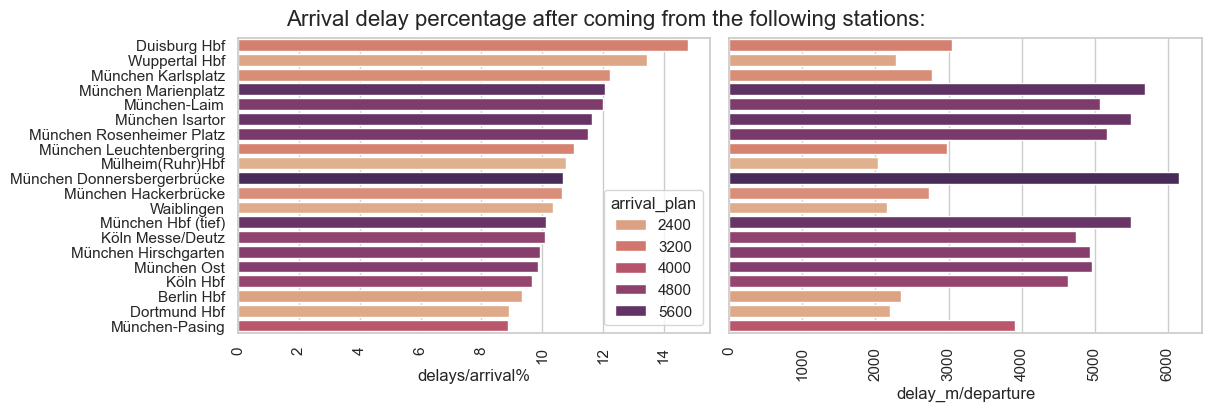

In [51]:
df_path_plot = df_path[["path","delays/arrival","arrival_plan"]].sort_values("arrival_plan", ascending=False).head(100).sort_values("delays/arrival", ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
sns.set_theme(style="whitegrid")

path_stations = df_path_plot["path"].values

sns.barplot(data=df_path_plot, y="path", x="delays/arrival", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[0])
axes[0].set_xlabel(f"delays/arrival%")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel("")

sns.barplot(data=df_path_plot, y="path", x="arrival_plan", 
        palette="flare", orient="h", hue="arrival_plan", ax=axes[1])
axes[1].set_xlabel(f"delay_m/departure")
axes[1].tick_params(axis='x', rotation=90)
axes[1].get_legend().remove()
axes[1].get_yaxis().set_visible(False)

fig.suptitle("Arrival delay percentage after coming from the following stations:", fontsize=16)
plt.show()


In [59]:
names = [] 
names.extend(stations_line)
names.extend(path_stations)
names.extend(station_top)

In [60]:
names = [station.replace(' ', '') for station in names]
names = [station.replace('(', '') for station in names]
names = [station.replace(')', '') for station in names]
names = [station.replace('Main', '') for station in names]
names = [station.replace('Flughafen', '') for station in names]


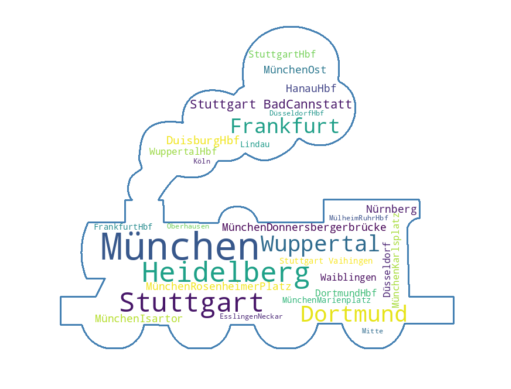

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = ' '.join(names)

mask = np.array(Image.open("images/trainshape.png"))
wc = WordCloud(background_color="white", max_words=30, mask=mask,
                contour_width=3, contour_color='steelblue')

wordcloud = wc.generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()